## Create new data using neural style transfer


In [3]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [4]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


In [5]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [22]:
style_image = load_image(r'Data\Real Data\image_84.png')

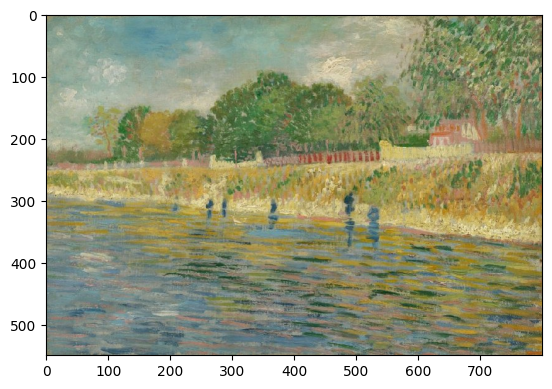

In [23]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [42]:
content =load_image(r'Data\Natural pic\109.jpg')


In [43]:
stylized_image = model(tf.constant(content), tf.constant(style_image))[0]


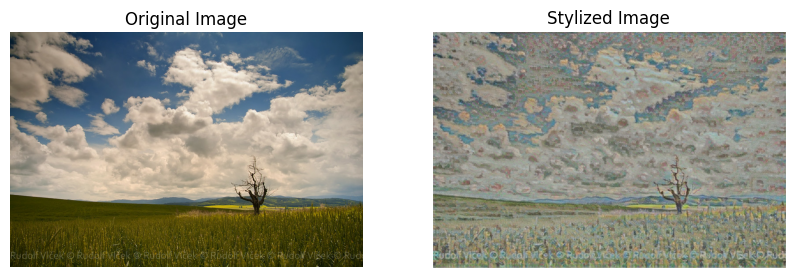

In [44]:
fig ,axes = plt.subplots(1,2,figsize=(10, 5))
axes[0].imshow(np.squeeze(content))
axes[0].set_title('Original Image')
axes[0].axis('off') 

axes[1].imshow(np.squeeze(stylized_image))
axes[1].set_title('Stylized Image')
axes[1].axis('off') 


plt.show()

In [26]:
newpath=r'Data\Natural pic stylized'

In [27]:
for file in os.listdir(r'Data\Natural pic'):
    content_image = load_image(os.path.join(r'Data\Natural pic',file))
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    save_path = os.path.join(newpath, file)
    cv2.imwrite(save_path, cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))
